# Sentiment Analysis of Farmers' Protest 

By Rahul Prakash

In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\Farmers Protest Sentiment Analysis\tweetsfarmbills.csv')

In [7]:
df.head()

,Unnamed: 0,Date,Tweet,Tweet Source,Retweets,Likes,Location,Clean Tweet,SS
0,0,2021-01-01 23:48:40,#respecteachother #kissanAndolan #KisanVirodhi...,Twitter for Android,0,0,NaN,when you stop listening and just want proof th...,NEGATIVE
1,1,2021-01-01 21:16:19,https://t.co/rkCCnptRGT https://t.co/rkCCnptRG...,Twitter for Android,0,0,India,speech farmers protest must watch and share,POSITIVE
2,2,2021-01-01 20:10:18,Half the problem got sorted when @RahulGandhi ...,Twitter Web App,4,8,"New Delhi, India",half the problem got sorted when left the rema...,NEGATIVE
3,3,2021-01-01 19:49:52,@_pallavighosh @RSSxve Could have been drafted...,Twitter for Android,0,0,NaN,could have been drafted much bettercoming from...,NEGATIVE
4,4,2021-01-01 19:27:42,The French Revolution was a turning-point in t...,Twitter for Android,3,14,NaN,the french revolution was turningpoint the ris...,POSITIVE


In [23]:
#_get_value gets a tweet from a given index in a database.
string = df._get_value(8, 'Clean Tweet')
string

'farmers are dying you would die due hunger simple that'

In [24]:
#create a textblob object
obj = TextBlob(string)

#sentiment is an index which return a value between -1 and 1.
sentiment = obj.sentiment.polarity

#Prints the value
print(sentiment)

-0.0625


This is essentially the process we are going to use in sentiment analysis. A positive value in sentiment means it's a positive statement, negative value implies negative sentiment and 0 implies neutral.

This statement is a hybrid of negative and neutral.

In [29]:
for i in range(10):
    string = df._get_value(i, 'Clean Tweet')
    obj = TextBlob(string)
    sentiment = obj.sentiment.polarity
    print(sentiment)

0.14285714285714285
0.0
-0.08333333333333333
0.3
0.0
0.0
0.0
0.6
-0.0625
0.0


In [32]:
#Counting number of positive,negative and neutral opinions.
positive = 0
negative = 0
neutral = 0
for i in range(3749):
    string = df._get_value(i, 'Clean Tweet')
    obj = TextBlob(string)
    sentiment = obj.sentiment.polarity
    if(sentiment > 0):
        positive += 1
    if(sentiment < 0):
        negative += 1
    if(sentiment == 0):
        neutral += 1
print("The number of positive views are : " + str(positive))
print("The number of negative views are : " + str(negative))
print("The number of neutral views are : " + str(neutral))

The number of positive views are : 1391
The number of negative views are : 704
The number of neutral views are : 1654


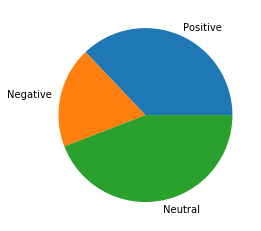

In [34]:
#Representaion of views in a pie chart
slices = [positive, negative, neutral]
Names = ['Positive', 'Negative', 'Neutral']
plt.pie(slices, labels = Names)
plt.show()

Thus the majority of views on this topic are neutral and positive, showing strong support for the farmers' protest.

## Concentration of tweets across different places

In [44]:
Places = []
Dictionary = {}
for i in range(3749):
    string = df._get_value(i, 'Location')
    if string not in Places:
        Places.append(string)
for place in Places:
    count = 0
    for i in range(3749):
        string = df._get_value(i,'Location')
        if(string == place):
            count += 1
    Dictionary.update({place : count})
for key in Dictionary:
    if(Dictionary[key]>=25):
        print(key + " : " + str(Dictionary[key]))

India : 327
New Delhi, India : 145
Bengaluru, India : 27
Mumbai : 33
Chandigarh, India : 44
New Delhi : 38
Mumbai, India : 50
Hyderabad, India : 36
Brampton, Ontario : 26
Punjab, India : 34


These are the places where more than 25 tweets have been made about the issue.

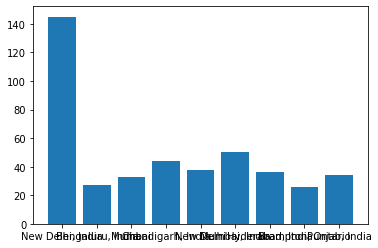

In [50]:
keys = []
values = []
for key in Dictionary:
    if(Dictionary[key]>=25 and Dictionary[key]<200):
        keys.append(key)
        values.append(Dictionary[key])
plt.bar(keys,values)
plt.show()

Let us make a sentiment analysis of tweets based in one Place, say, New Delhi, The epicentre of this conflict.

## Sentiment Analysis of Given Issue Local to New Delhi 

First, Let us collect all tweets from New Delhi.

In [46]:
df.loc[df['Location'] == 'New Delhi, India']

,Unnamed: 0,Date,Tweet,Tweet Source,Retweets,Likes,Location,Clean Tweet,SS
2,2,2021-01-01 20:10:18,Half the problem got sorted when @RahulGandhi ...,Twitter Web App,4,8,"New Delhi, India",half the problem got sorted when left the rema...,NEGATIVE
9,9,2021-01-01 18:10:24,Press conference by Kisan Andolan representati...,Twitter for iPhone,0,0,"New Delhi, India",press conference kisan andolan representatives...,POSITIVE
16,16,2021-01-01 16:41:18,@narendramodi @PMOIndia @nstomar \nThis is all...,Twitter Web App,0,1,"New Delhi, India",this all you people and never forget that hist...,NEGATIVE
55,55,2021-01-01 04:46:15,Watch here farmers protests full documentary\n...,Twitter for Android,0,0,"New Delhi, India",watch here farmers protests full documentary c...,NEGATIVE
57,57,2021-01-01 03:51:31,@mastersheefu_\n\nGood Morning\n🙏🙏🙏\n\nTo supp...,Twitter for Android,1,2,"New Delhi, India",good morning support farmers posting this picture,POSITIVE
...,...,...,...,...,...,...,...,...,...
3359,3359,2020-12-18 09:26:49,"""New Agri laws haven't come overnight...""\n\nR...",Twitter Web App,1,1,"New Delhi, India",new agri laws havent come overnight read what ...,NEGATIVE
3364,3364,2020-12-18 09:18:22,The Farmers Acts – A Bird’s Eye View. Written ...,Twitter for Advertisers (legacy),0,3,"New Delhi, India",the farmers acts birds eye view written adv ma...,POSITIVE
3556,3556,2020-12-18 01:30:00,"At this stage, farmers’ protest should be allo...",TweetDeck,0,0,"New Delhi, India",this stage farmers protest should allowed says,NEGATIVE
3572,3572,2020-12-17 23:41:46,People who have never done agriculture or not ...,Twitter for Android,0,0,"New Delhi, India",people who have never done agriculture not eve...,POSITIVE


In [47]:
positive = 0
negative = 0
neutral = 0
for i in range(3749):
    string = df._get_value(i, 'Clean Tweet')
    stringone = df._get_value(i, 'Location')
    if(stringone == 'New Delhi, India'):
        obj = TextBlob(string)
        senti = obj.sentiment.polarity
        if(senti > 0):
            positive += 1
        if(senti < 0):
            negative += 1
        if(senti == 0):
            neutral += 1
print("The number of positive views are : " + str(positive))
print("The number of negative views are : " + str(negative))
print("The number of neutral views are : " + str(neutral))

The number of positive views are : 61
The number of negative views are : 37
The number of neutral views are : 47


In [48]:
61+37+47

145

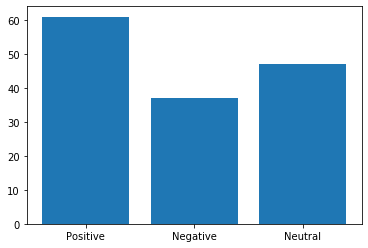

In [51]:
#Representaion of views in a pie chart
slices = [positive, negative, neutral]
Names = ['Positive', 'Negative', 'Neutral']
plt.bar(Names, slices)
plt.show()

Thus, a lot of the people in Delhi are in support of the movement

## Classification By Date 

Let Us take the dates from 26th December 2020 to 1st January 2020.

In [58]:
positive = 0
negative = 0
for i in range(3749):
    string = df._get_value(i, 'Date')
    stringone = df._get_value(i, 'Clean Tweet')
    if('2020-12-26' in string):
        obj = TextBlob(stringone)
        sentiment = obj.sentiment.polarity
        if(sentiment > 0):
            positive += 1
        if(sentiment < 0):
            negative +=1
print("The number of positive views are : " + str(positive))
print("The number of negative views are : " + str(negative))

The number of positive views are : 99
The number of negative views are : 47


In [59]:
positive = 0
negative = 0
for i in range(3749):
    string = df._get_value(i, 'Date')
    stringone = df._get_value(i, 'Clean Tweet')
    if('2020-12-27' in string):
        obj = TextBlob(stringone)
        sentiment = obj.sentiment.polarity
        if(sentiment > 0):
            positive += 1
        if(sentiment < 0):
            negative +=1
print("The number of positive views are : " + str(positive))
print("The number of negative views are : " + str(negative))

The number of positive views are : 62
The number of negative views are : 36


In [60]:
positive = 0
negative = 0
for i in range(3749):
    string = df._get_value(i, 'Date')
    stringone = df._get_value(i, 'Clean Tweet')
    if('2020-12-28' in string):
        obj = TextBlob(stringone)
        sentiment = obj.sentiment.polarity
        if(sentiment > 0):
            positive += 1
        if(sentiment < 0):
            negative +=1
print("The number of positive views are : " + str(positive))
print("The number of negative views are : " + str(negative))

The number of positive views are : 53
The number of negative views are : 30


In [61]:
positive = 0
negative = 0
for i in range(3749):
    string = df._get_value(i, 'Date')
    stringone = df._get_value(i, 'Clean Tweet')
    if('2020-12-29' in string):
        obj = TextBlob(stringone)
        sentiment = obj.sentiment.polarity
        if(sentiment > 0):
            positive += 1
        if(sentiment < 0):
            negative +=1
print("The number of positive views are : " + str(positive))
print("The number of negative views are : " + str(negative))

The number of positive views are : 80
The number of negative views are : 43


In [63]:
positive = 0
negative = 0
for i in range(3749):
    string = df._get_value(i, 'Date')
    stringone = df._get_value(i, 'Clean Tweet')
    if('2020-12-30' in string):
        obj = TextBlob(stringone)
        sentiment = obj.sentiment.polarity
        if(sentiment > 0):
            positive += 1
        if(sentiment < 0):
            negative +=1
print("The number of positive views are : " + str(positive))
print("The number of negative views are : " + str(negative))

The number of positive views are : 112
The number of negative views are : 46


In [64]:
positive = 0
negative = 0
for i in range(3749):
    string = df._get_value(i, 'Date')
    stringone = df._get_value(i, 'Clean Tweet')
    if('2020-12-31' in string):
        obj = TextBlob(stringone)
        sentiment = obj.sentiment.polarity
        if(sentiment > 0):
            positive += 1
        if(sentiment < 0):
            negative +=1
print("The number of positive views are : " + str(positive))
print("The number of negative views are : " + str(negative))

The number of positive views are : 50
The number of negative views are : 22


In [65]:
positive = 0
negative = 0
for i in range(3749):
    string = df._get_value(i, 'Date')
    stringone = df._get_value(i, 'Clean Tweet')
    if('2021-01-01' in string):
        obj = TextBlob(stringone)
        sentiment = obj.sentiment.polarity
        if(sentiment > 0):
            positive += 1
        if(sentiment < 0):
            negative +=1
print("The number of positive views are : " + str(positive))
print("The number of negative views are : " + str(negative))

The number of positive views are : 26
The number of negative views are : 8


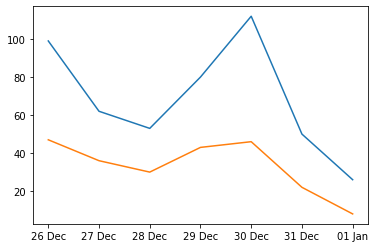

In [68]:
Positives = [99,62,53,80,112,50,26]
Negatives = [47,36,30,43,46,22,8]
Dates = ['26 Dec','27 Dec','28 Dec','29 Dec','30 Dec','31 Dec','01 Jan']
plt.plot(Dates,Positives)
plt.plot(Dates,Negatives)
plt.show()

The blue line denotes number of positive comments and orange line denotes number of negative comments. We can see that the number of positive comments far outnumber the number of negative comments, indicating a more positive outlook of the issue among the public in recent times. On 30th December 2020, Positive comments hit a Peak at 112, whereas the number of negative comments sharply decreased from 26 Dec onwards.

## Most Retweeted tweets 

In [82]:
for i in range(3749):
    string = df._get_value(i, 'Clean Tweet')
    number = df._get_value(i, 'Retweets')
    if(number >= 100):
        obj = TextBlob(string)
        sentiment = obj.sentiment.polarity
        if(sentiment > 0):
            positive += 1
        if(sentiment < 0):
            negative += 1
print("The number of positive views are : " + str(positive))
print("The number of negative views are : " + str(negative))

The number of positive views are : 40
The number of negative views are : 16


## Most Liked Tweets 

In [83]:
for i in range(3749):
    string = df._get_value(i, 'Clean Tweet')
    number = df._get_value(i, 'Retweets')
    if(number >= 150):
        obj = TextBlob(string)
        sentiment = obj.sentiment.polarity
        if(sentiment > 0):
            positive += 1
        if(sentiment < 0):
            negative += 1
print("The number of positive views are : " + str(positive))
print("The number of negative views are : " + str(negative))

The number of positive views are : 43
The number of negative views are : 17
